In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [7]:
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1f0aee0af1deeb6dd9f51b59b4e9e0f


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

642

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sorland
Processing Record 2 of Set 1 | muros
Processing Record 3 of Set 1 | esperance
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | norman wells
Processing Record 6 of Set 1 | airai
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | aanekoski
Processing Record 9 of Set 1 | ulladulla
Processing Record 10 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 1 | maniitsoq
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | sivaki
Processing Record 15 of Set 1 | greenville
Processing Record 16 of Set 1 | makiwalo
Processing Record 17 of Set 1 | torbay
Processing Record 18 of Set 1 | clyde river
Processing Record 19 of Set 1 | amderma
City not found. Skipping...
Processing Record 20 of Set 1 | port macquarie
Processing Record 21 of Set 1 | ribeira grande
Processing Record

Processing Record 37 of Set 4 | isangel
Processing Record 38 of Set 4 | ahipara
Processing Record 39 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 40 of Set 4 | lebu
Processing Record 41 of Set 4 | wattegama
Processing Record 42 of Set 4 | banda aceh
Processing Record 43 of Set 4 | vicam
Processing Record 44 of Set 4 | eureka
Processing Record 45 of Set 4 | linqiong
Processing Record 46 of Set 4 | kununurra
Processing Record 47 of Set 4 | lagoa
Processing Record 48 of Set 4 | husavik
Processing Record 49 of Set 4 | fort saint john
City not found. Skipping...
Processing Record 50 of Set 4 | ilulissat
Processing Record 1 of Set 5 | kodiak
Processing Record 2 of Set 5 | dwarka
Processing Record 3 of Set 5 | yura
Processing Record 4 of Set 5 | georgetown
Processing Record 5 of Set 5 | cascais
Processing Record 6 of Set 5 | romny
Processing Record 7 of Set 5 | bandarbeyla
Processing Record 8 of Set 5 | pacific grove
Processing Record 9 of Set 5 | krutinka
Processing 

Processing Record 26 of Set 8 | noumea
Processing Record 27 of Set 8 | fairview
Processing Record 28 of Set 8 | saryagash
Processing Record 29 of Set 8 | dunda
Processing Record 30 of Set 8 | luanda
Processing Record 31 of Set 8 | esso
Processing Record 32 of Set 8 | changji
Processing Record 33 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 34 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 35 of Set 8 | cherskiy
Processing Record 36 of Set 8 | perelyub
Processing Record 37 of Set 8 | banyo
Processing Record 38 of Set 8 | katsuura
Processing Record 39 of Set 8 | buckeye
Processing Record 40 of Set 8 | paamiut
Processing Record 41 of Set 8 | bredasdorp
Processing Record 42 of Set 8 | quatre cocos
Processing Record 43 of Set 8 | haicheng
Processing Record 44 of Set 8 | boksitogorsk
Processing Record 45 of Set 8 | chara
Processing Record 46 of Set 8 | adrar
Processing Record 47 of Set 8 | boda
Processing Record 48 of Set 8 | ordu
Processing Record 49 

Processing Record 16 of Set 12 | amga
Processing Record 17 of Set 12 | sola
Processing Record 18 of Set 12 | terrak
Processing Record 19 of Set 12 | orta nova
Processing Record 20 of Set 12 | svetlaya
Processing Record 21 of Set 12 | mnogovershinnyy
Processing Record 22 of Set 12 | tiarei
Processing Record 23 of Set 12 | kasungu
Processing Record 24 of Set 12 | naftah
City not found. Skipping...
Processing Record 25 of Set 12 | piranhas
Processing Record 26 of Set 12 | alice springs
Processing Record 27 of Set 12 | hanna
Processing Record 28 of Set 12 | klyuchi
Processing Record 29 of Set 12 | bumba
Processing Record 30 of Set 12 | kathu
Processing Record 31 of Set 12 | hay river
Processing Record 32 of Set 12 | matam
Processing Record 33 of Set 12 | stoyba
City not found. Skipping...
Processing Record 34 of Set 12 | xining
Processing Record 35 of Set 12 | varva
Processing Record 36 of Set 12 | sungai padi
Processing Record 37 of Set 12 | srednekolymsk
Processing Record 38 of Set 12 | 

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sorland,67.6670,12.6934,31.86,94,100,25.50,NO,2022-02-04 14:52:17
1,Muros,42.7762,-9.0603,60.67,80,99,8.52,ES,2022-02-04 14:52:17
2,Esperance,-33.8667,121.9000,69.64,72,0,16.64,AU,2022-02-04 14:52:18
3,Mataura,-46.1927,168.8643,49.48,99,100,1.79,NZ,2022-02-04 14:52:18
4,Norman Wells,65.2820,-126.8329,-32.76,68,20,10.36,CA,2022-02-04 14:52:18
5,Airai,-8.9266,125.4092,61.34,90,100,1.97,TL,2022-02-04 14:52:19
6,Chokurdakh,70.6333,147.9167,-30.19,100,48,1.63,RU,2022-02-04 14:52:19
7,Aanekoski,62.6946,25.8180,23.07,100,100,16.51,FI,2022-02-04 14:52:19
8,Ulladulla,-35.3500,150.4667,64.87,85,90,8.79,AU,2022-02-04 14:52:20
9,Maniitsoq,65.4167,-52.9000,5.85,85,100,18.28,GL,2022-02-04 14:52:20


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [21]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sorland,NO,2022-02-04 14:52:17,67.6670,12.6934,31.86,94,100,25.50
1,Muros,ES,2022-02-04 14:52:17,42.7762,-9.0603,60.67,80,99,8.52
2,Esperance,AU,2022-02-04 14:52:18,-33.8667,121.9000,69.64,72,0,16.64
3,Mataura,NZ,2022-02-04 14:52:18,-46.1927,168.8643,49.48,99,100,1.79
4,Norman Wells,CA,2022-02-04 14:52:18,65.2820,-126.8329,-32.76,68,20,10.36
5,Airai,TL,2022-02-04 14:52:19,-8.9266,125.4092,61.34,90,100,1.97
6,Chokurdakh,RU,2022-02-04 14:52:19,70.6333,147.9167,-30.19,100,48,1.63
7,Aanekoski,FI,2022-02-04 14:52:19,62.6946,25.8180,23.07,100,100,16.51
8,Ulladulla,AU,2022-02-04 14:52:20,-35.3500,150.4667,64.87,85,90,8.79
9,Maniitsoq,GL,2022-02-04 14:52:20,65.4167,-52.9000,5.85,85,100,18.28


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

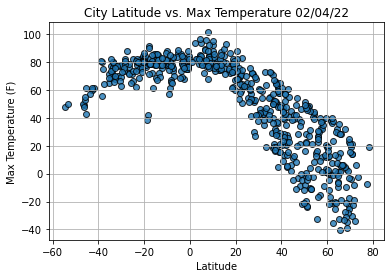

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

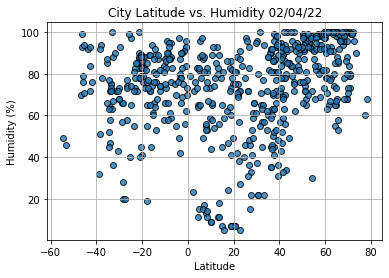

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

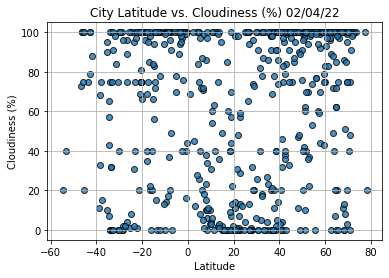

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()